<a href="https://colab.research.google.com/github/helena31415/SR_Enciclopedia/blob/main/lista02_RADIACAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assuma que o fluxo solar normal ao feixe é uma constante de 1367 W/m², e observe que o Polo Norte está inclinado 23° em direção ao Sol no momento do solstício.

1)Deduza a expressão para cálculo do ângulo horário no nascer e por do sol

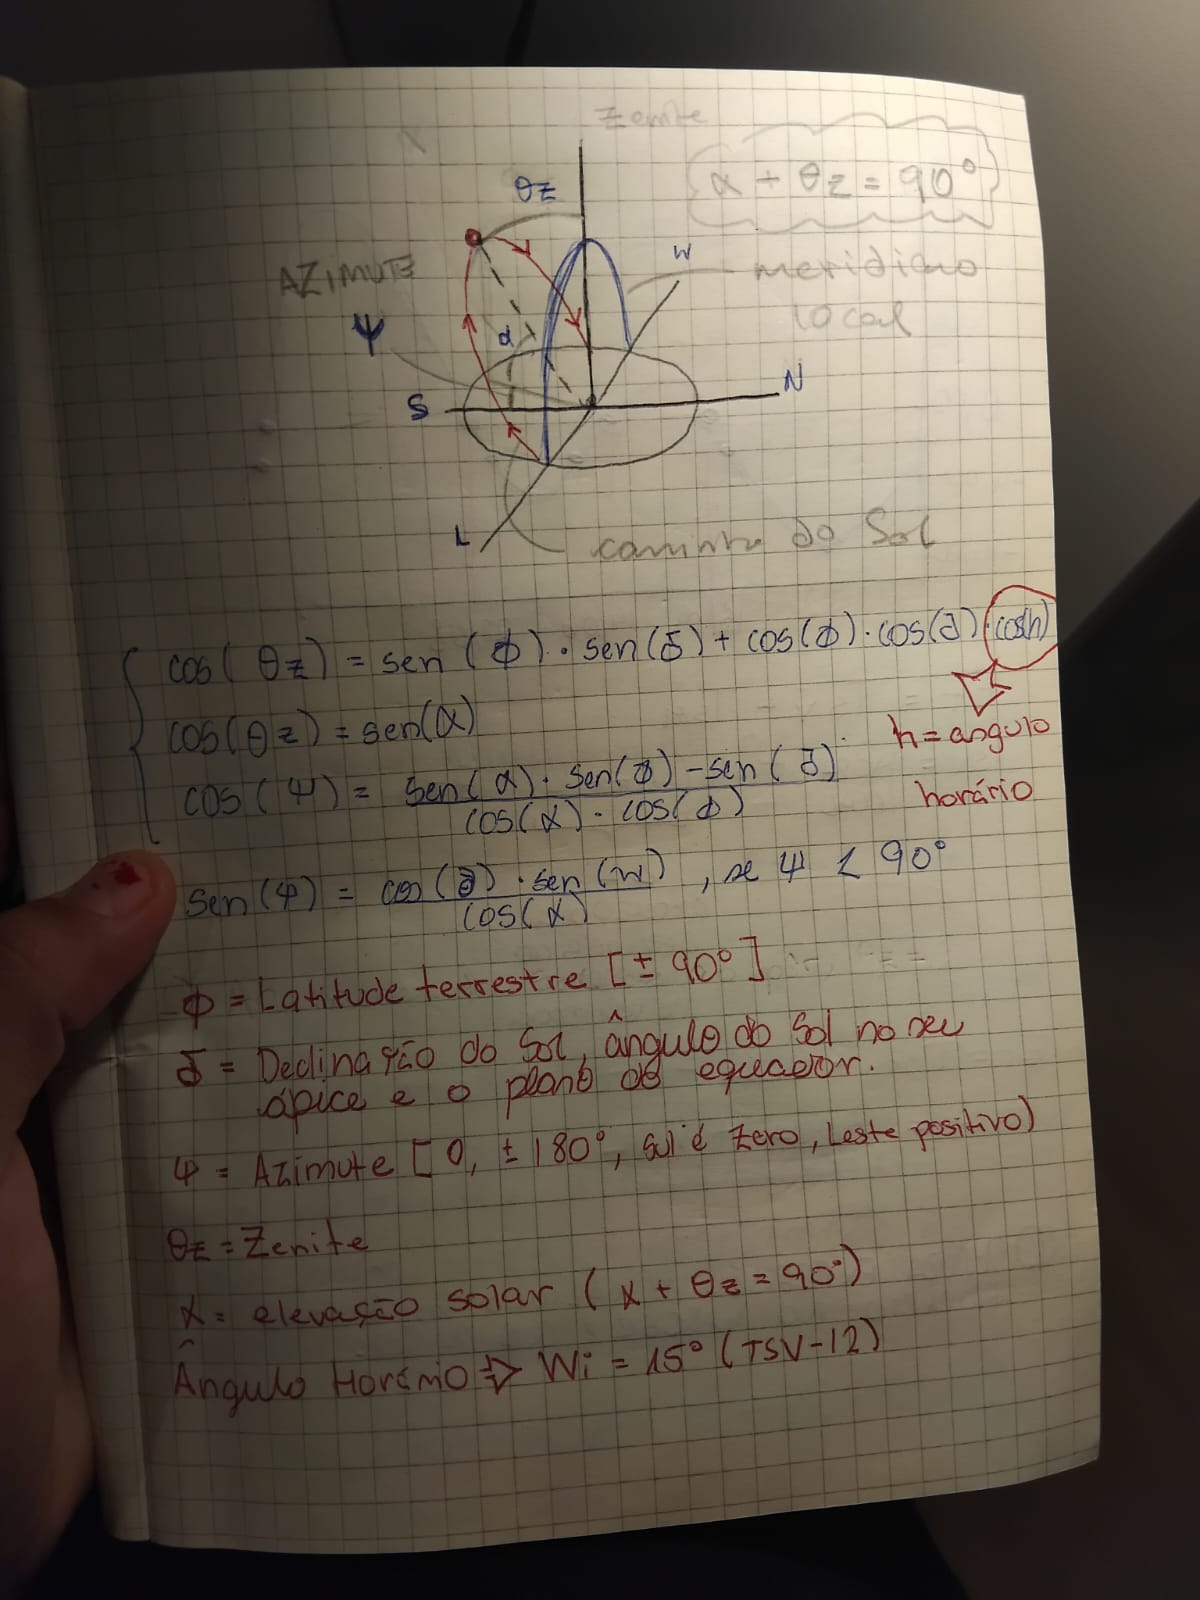

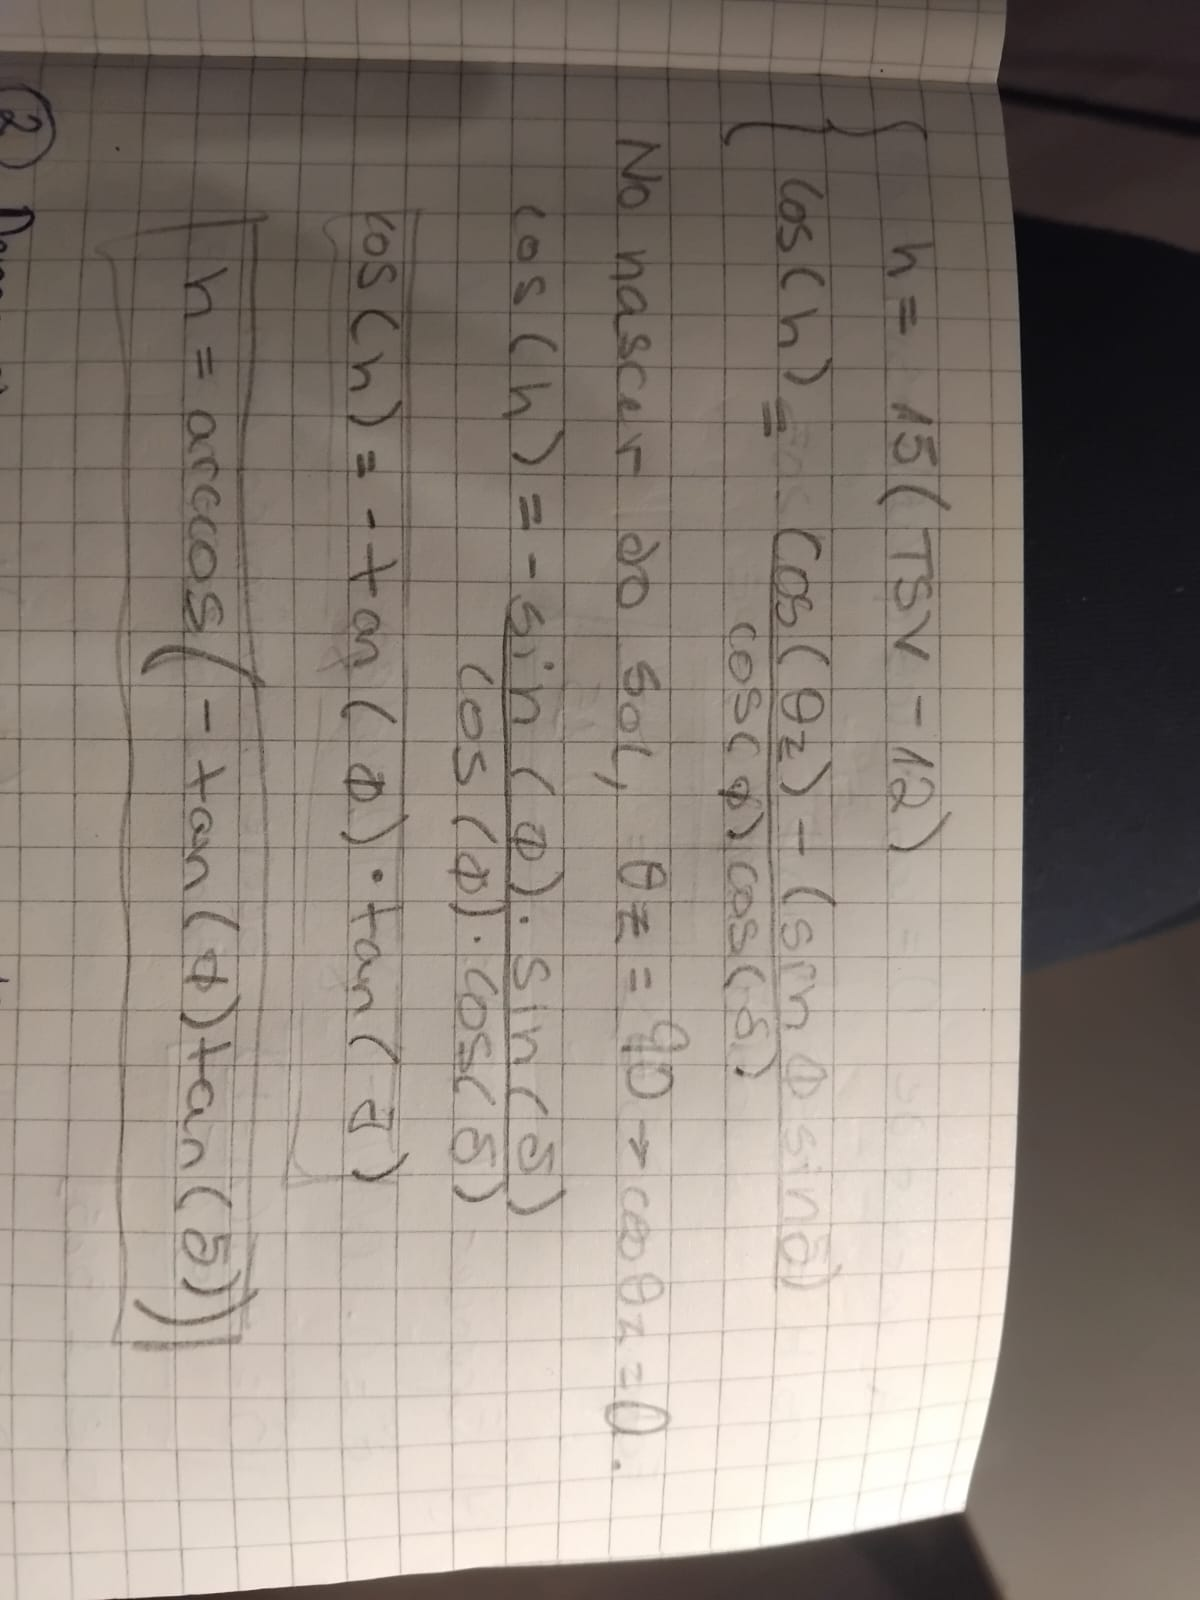

2)Demonstre analiticamente que o sol culmina no zênite de um local somente quando δ=φ.

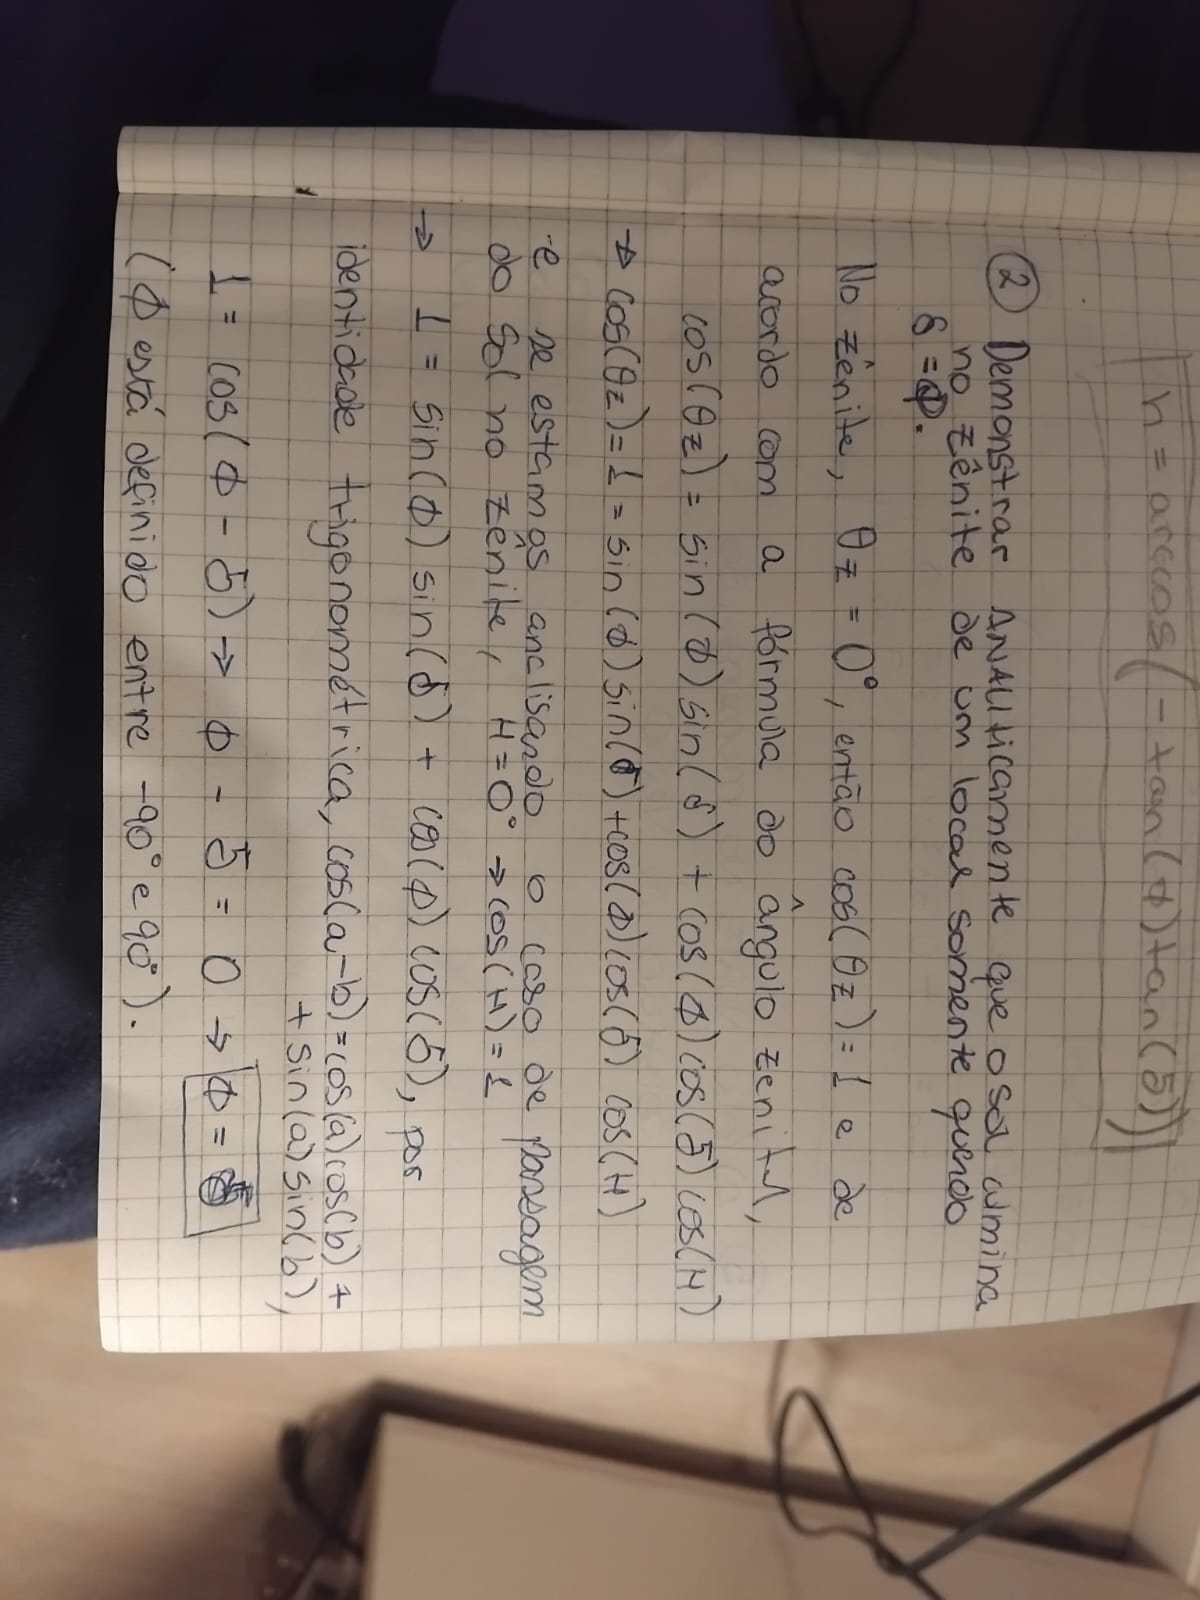

# 3) 3) Calcule e plote a variação anual do tamanho dia para as seguintes latitudes: 5ºS, 22,5ºS, 40ºS, 55ºS e 62º. Realize o mesmo procedimento para as mesmas latitudes no hemisfério sul.

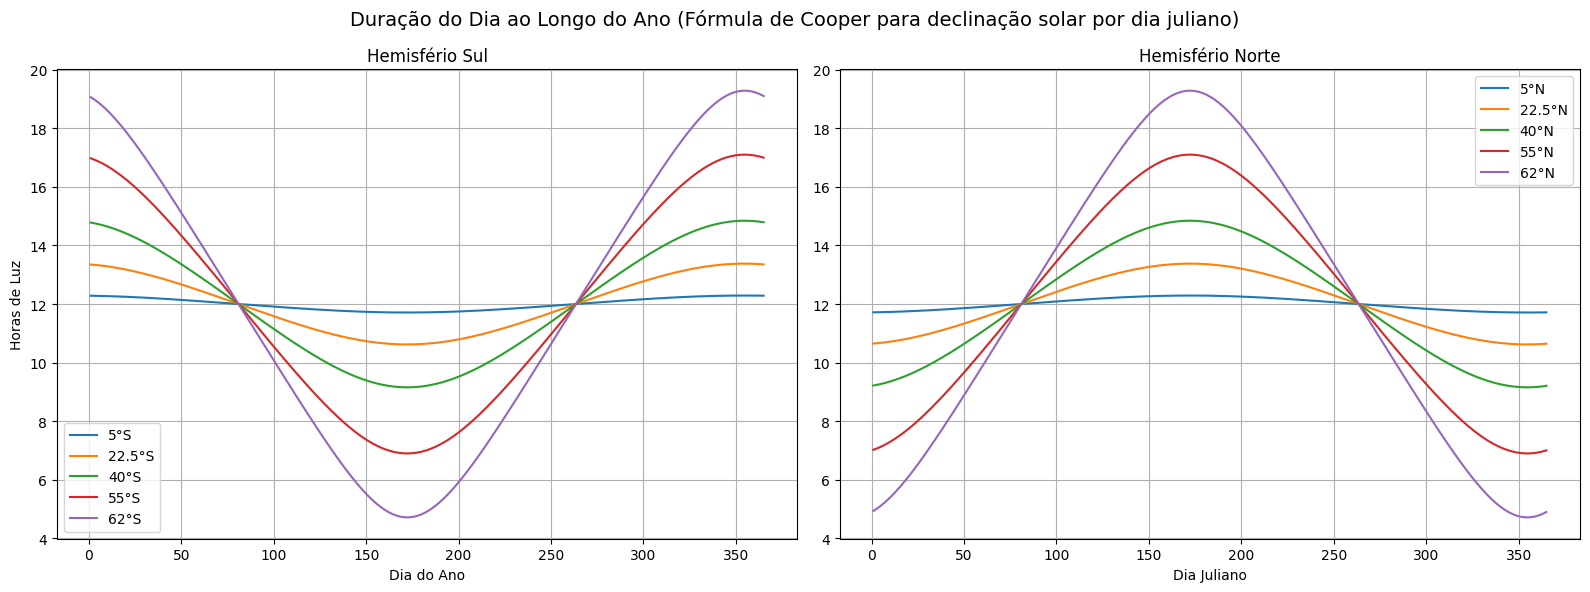

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import degrees, radians, acos, tan

def horas_de_luz(latitude_graus, declinacao_graus):
    phi = radians(latitude_graus)
    delta = radians(declinacao_graus)
    argumento = -tan(phi) * tan(delta)
    if argumento <= -1:
        return 24  # Dia permanente
    elif argumento >= 1:
        return 0   # Noite permanente
    else:
        h = degrees(acos(argumento))
        return 2 * h / 15

def declinacao_cooper(dia_do_ano):
    return 23.45 * np.sin(np.radians(360/365 * (dia_do_ano + 284)))

dias = np.arange(1, 366)
latitudes_sul = [-5, -22.5, -40, -55, -62]
latitudes_norte = [5, 22.5, 40, 55, 62]

# Usamos a MESMA declinação para ambos os hemisférios!
declinacao = declinacao_cooper(dias)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Hemisfério Sul (latitudes negativas)
for lat in latitudes_sul:
    horas = [horas_de_luz(lat, delta) for delta in declinacao]
    ax1.plot(dias, horas, label=f'{abs(lat)}°S')
ax1.set_title('Hemisfério Sul')
ax1.set_xlabel('Dia do Ano')
ax1.set_ylabel('Horas de Luz')
ax1.legend()
ax1.grid()

# Hemisfério Norte (latitudes positivas)
for lat in latitudes_norte:
    horas = [horas_de_luz(lat, delta) for delta in declinacao]
    ax2.plot(dias, horas, label=f'{lat}°N')
ax2.set_title('Hemisfério Norte')
ax2.set_xlabel('Dia Juliano')
ax2.legend()
ax2.grid()

plt.suptitle('Duração do Dia ao Longo do Ano (Fórmula de Cooper para declinação solar por dia juliano)', fontsize=14)
plt.tight_layout()
plt.show()

# 4) Calcule a Excentricidade Eo =(ro/r)2 da terra no dia 10 novembro e distância da terra r em Unidade Astronômica. Considere as equações proposta por Spencer e Duffie e Beckman. Compare os resultados;

Spencer (1971) e Duffie & Beckman (1991)

1)  Distância Média: r0 = 1 UA ≈ 1,496.108 km (04/04 e 05/10)

	  Periélio ≈ 0,983 UA (03/01) ≈ 147,1 milhões de  km

	  Afélio ≈ 1,017 UA (04/07) UA ≈ 152,1 milhões de km


2) E0 = (r0/r)2 = 1,000110 + 0,034221 cosΓ + 0,001280 senΓ + 0,000719 cos2Γ + 0,000077 sen2Γ (Spencer, 1971)
	Γ (ângulo diário, em radianos) = 2π(dn-1)/365
	dn varia de 1 a 365
  

3) E0 = (r0/r)2 = 1 + 0,033 cos(2πdn/365) (Spencer, 1971)

In [ ]:
from datetime import datetime

def dia_juliano(dia, mes, ano=2023):
    data = datetime(ano, mes, dia)
    inicio_ano = datetime(ano, 1, 1)
    return (data - inicio_ano).days + 1
dia_juliano(10, 11)

314

In [ ]:
import numpy as np

# Dia do ano: 10 de novembro
n = dia_juliano(10, 11)

# -----------------------------
# 1. SPENCER (1971)
# -----------------------------
def r_spencer(n):
    B = 2 * np.pi * (n - 1) / 365
    r_ua = 1.000110 + 0.034221*np.cos(B) + 0.001280*np.sin(B) + \
           0.000719*np.cos(2*B) + 0.000077*np.sin(2*B)
    E0 = (1 / r_ua) ** 2
    return r_ua, E0

# -----------------------------
# 2. DUFFIE & BECKMAN (1991)
# -----------------------------
def r_duffie_beckman(n):
    E0 = 1 + 0.033 * np.cos(np.radians(360 * n / 365))
    r_ua = 1 / np.sqrt(E0)
    return r_ua, E0

# Cálculos
r1, Eo1 = r_spencer(n)
r2, Eo2 = r_duffie_beckman(n)

# Resultados
print("=== Resultados para 10 de Novembro (n = 314) ===")
print(f"Spencer (1971):")
print(f"  Distância Terra-Sol r = {r1:.6f} UA")
print(f"  Excentricidade corrigida E0 = {Eo1:.6f}")

print(f"\nDuffie & Beckman (1991):")
print(f"  Distância Terra-Sol r = {r2:.6f} UA")
print(f"  Excentricidade corrigida E0 = {Eo2:.6f}")


=== Resultados para 10 de Novembro (n = 314) ===
Spencer (1971):
  Distância Terra-Sol r = 1.020282 UA
  Excentricidade corrigida E0 = 0.960638

Duffie & Beckman (1991):
  Distância Terra-Sol r = 0.989624 UA
  Excentricidade corrigida E0 = 1.021079


# 5) Calcule e compare com a Fig. 2.9 (LIVRO DE PETTY, G. W. 2004) a insolação média diária no topo da atmosfera [W/m2]para os seguintes dois casos:


(a) O Polo Norte no momento do solstício de verão no Hemisfério Norte.
(b) O equador no momento do equinócio.

In [ ]:
### a

from math import sin, cos, pi

# Parâmetros
constante_solar = 1361  # W/m²
dia_solsticio = 172      # Dia do ano (20-22 junho)
delta = np.radians(23.45)  # Declinação em radianos

# Excentricidade (Duffie & Beckman)
E0 = 1 + 0.033 * cos(2 * pi * dia_solsticio / 365)

# Cálculo de H0 (W/m² por dia)
H0 = 24 * constante_solar * E0 * sin(delta)

# Conversão para MJ/m²/dia
H0_MJ = H0 * 0.0864  # 1 W/m² = 0.0864 MJ/m²/dia

print(f"Insolação diária no topo da atmosfera (Polo Norte, solstício de verão):")
print(f"{H0:.2f} W/m²/dia")
print(f"{H0_MJ:.2f} MJ/m²/dia")
# Parâmetros
constante_solar = 1361  # W/m²
dia_solsticio = 172      # Dia do ano (20-22 junho)
delta = np.radians(23.45)  # Declinação em radianos

# Excentricidade (Duffie & Beckman)
E0 = 1 + 0.033 * cos(2 * pi * dia_solsticio / 365)

# Cálculo de H0 (W/m² por dia)
H0 = 24 * constante_solar * E0 * sin(delta)

# Conversão para MJ/m²/dia
H0_MJ = H0 * 0.0864  # 1 W/m² = 0.0864 MJ/m²/dia

print(f"Insolação diária no topo da atmosfera (Polo Norte, solstício de verão):")
print(f"{H0:.2f} W/m²/dia")
print(f"{H0_MJ:.2f} MJ/m²/dia")


Insolação diária no topo da atmosfera (Polo Norte, solstício de verão):
12576.63 W/m²/dia
1086.62 MJ/m²/dia
Insolação diária no topo da atmosfera (Polo Norte, solstício de verão):
12576.63 W/m²/dia
1086.62 MJ/m²/dia


In [ ]:
### b

constante_solar = 1361  # W/m²
dia_equinocio = 79      # 20 de março (dia 79 do ano)

E0 = 1 + 0.033 * cos(2 * pi * dia_equinocio / 365)

H0 = (24 / pi) * constante_solar * E0

H0_MJ = H0 * 0.0864

print(f"Insolação diária no topo da atmosfera (Equador, equinócio):")
print(f"{H0:.2f} W/m²/dia")
print(f"{H0_MJ:.2f} MJ/m²/dia")


Insolação diária no topo da atmosfera (Equador, equinócio):
10469.09 W/m²/dia
904.53 MJ/m²/dia


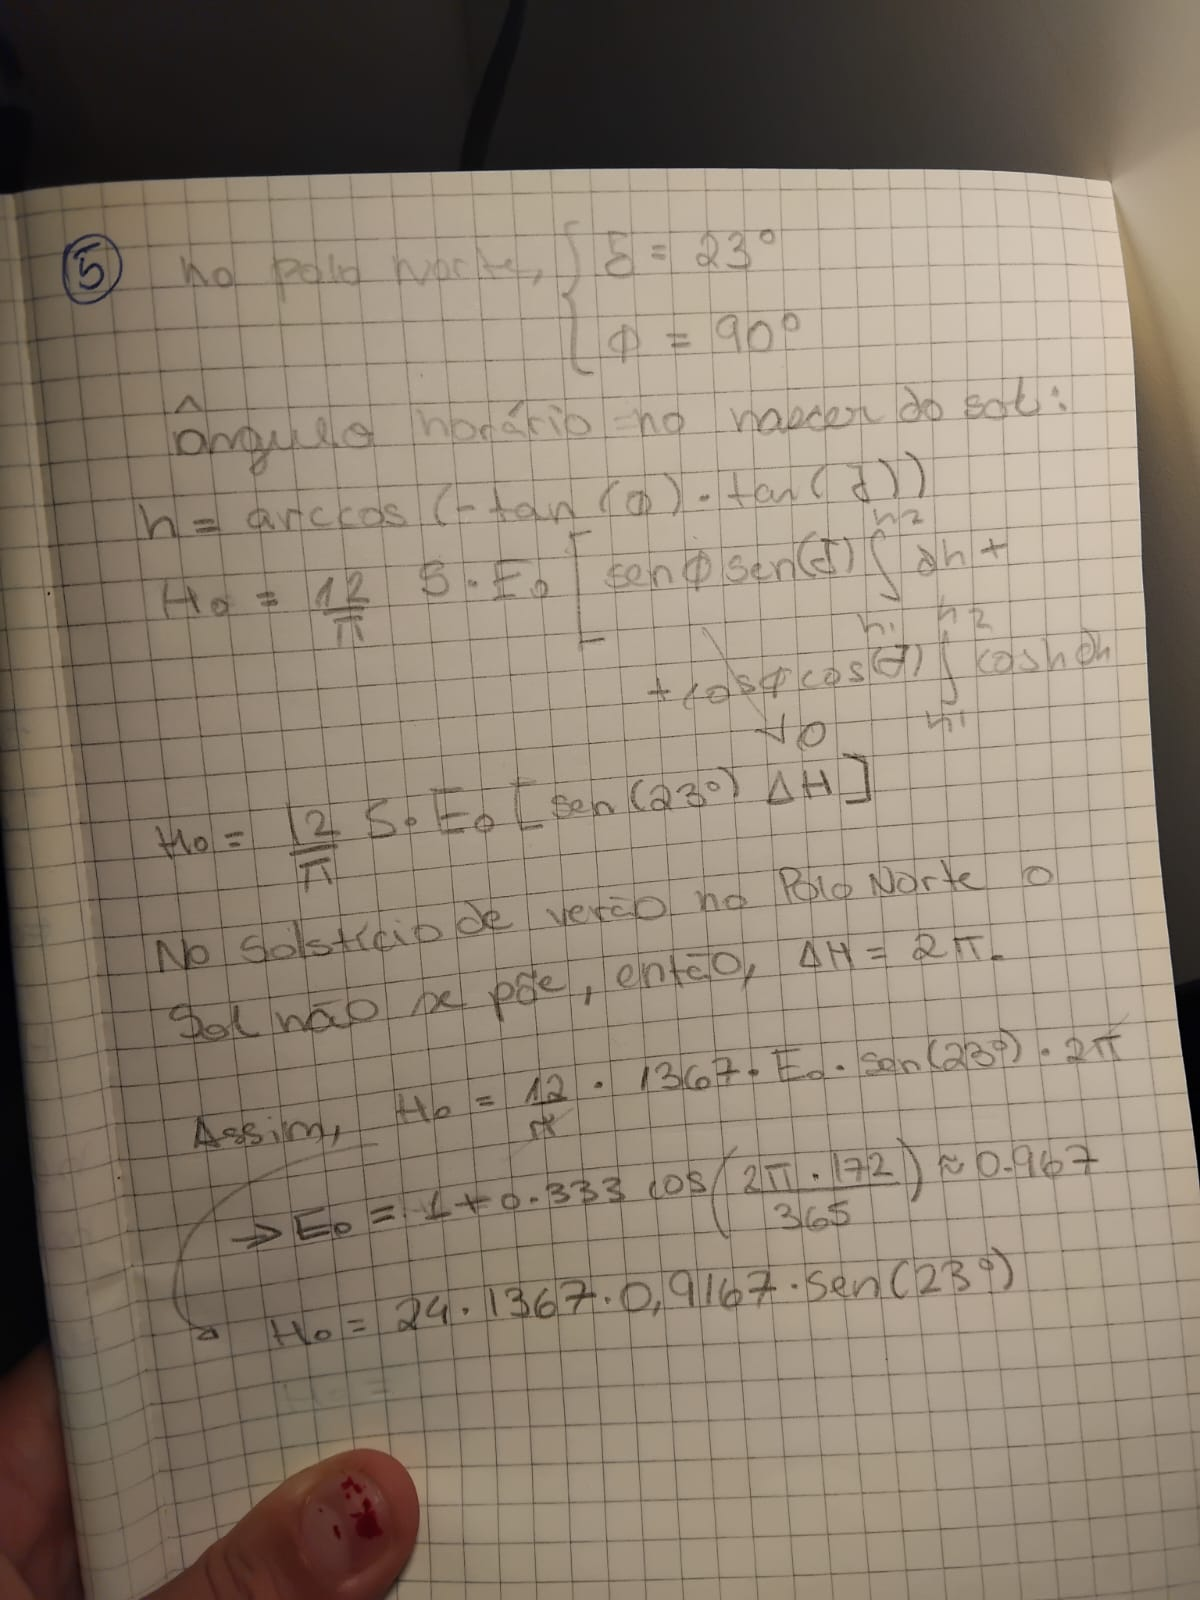


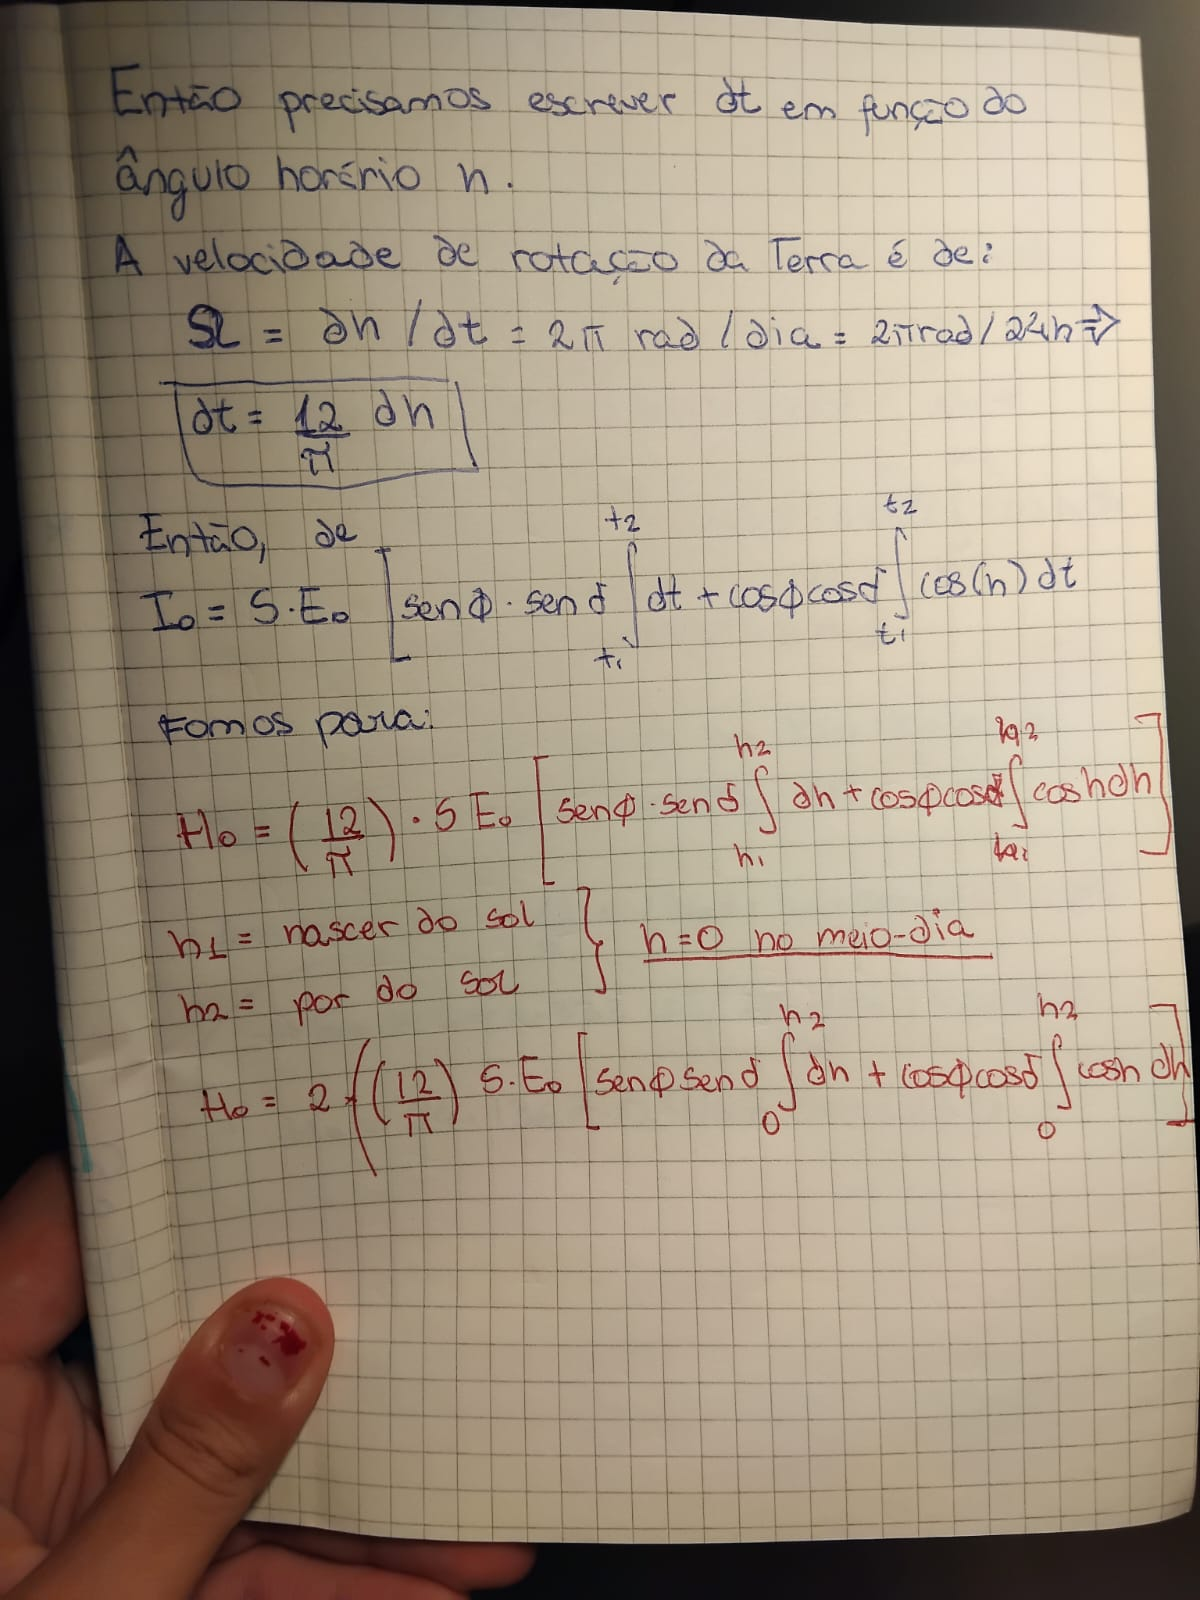
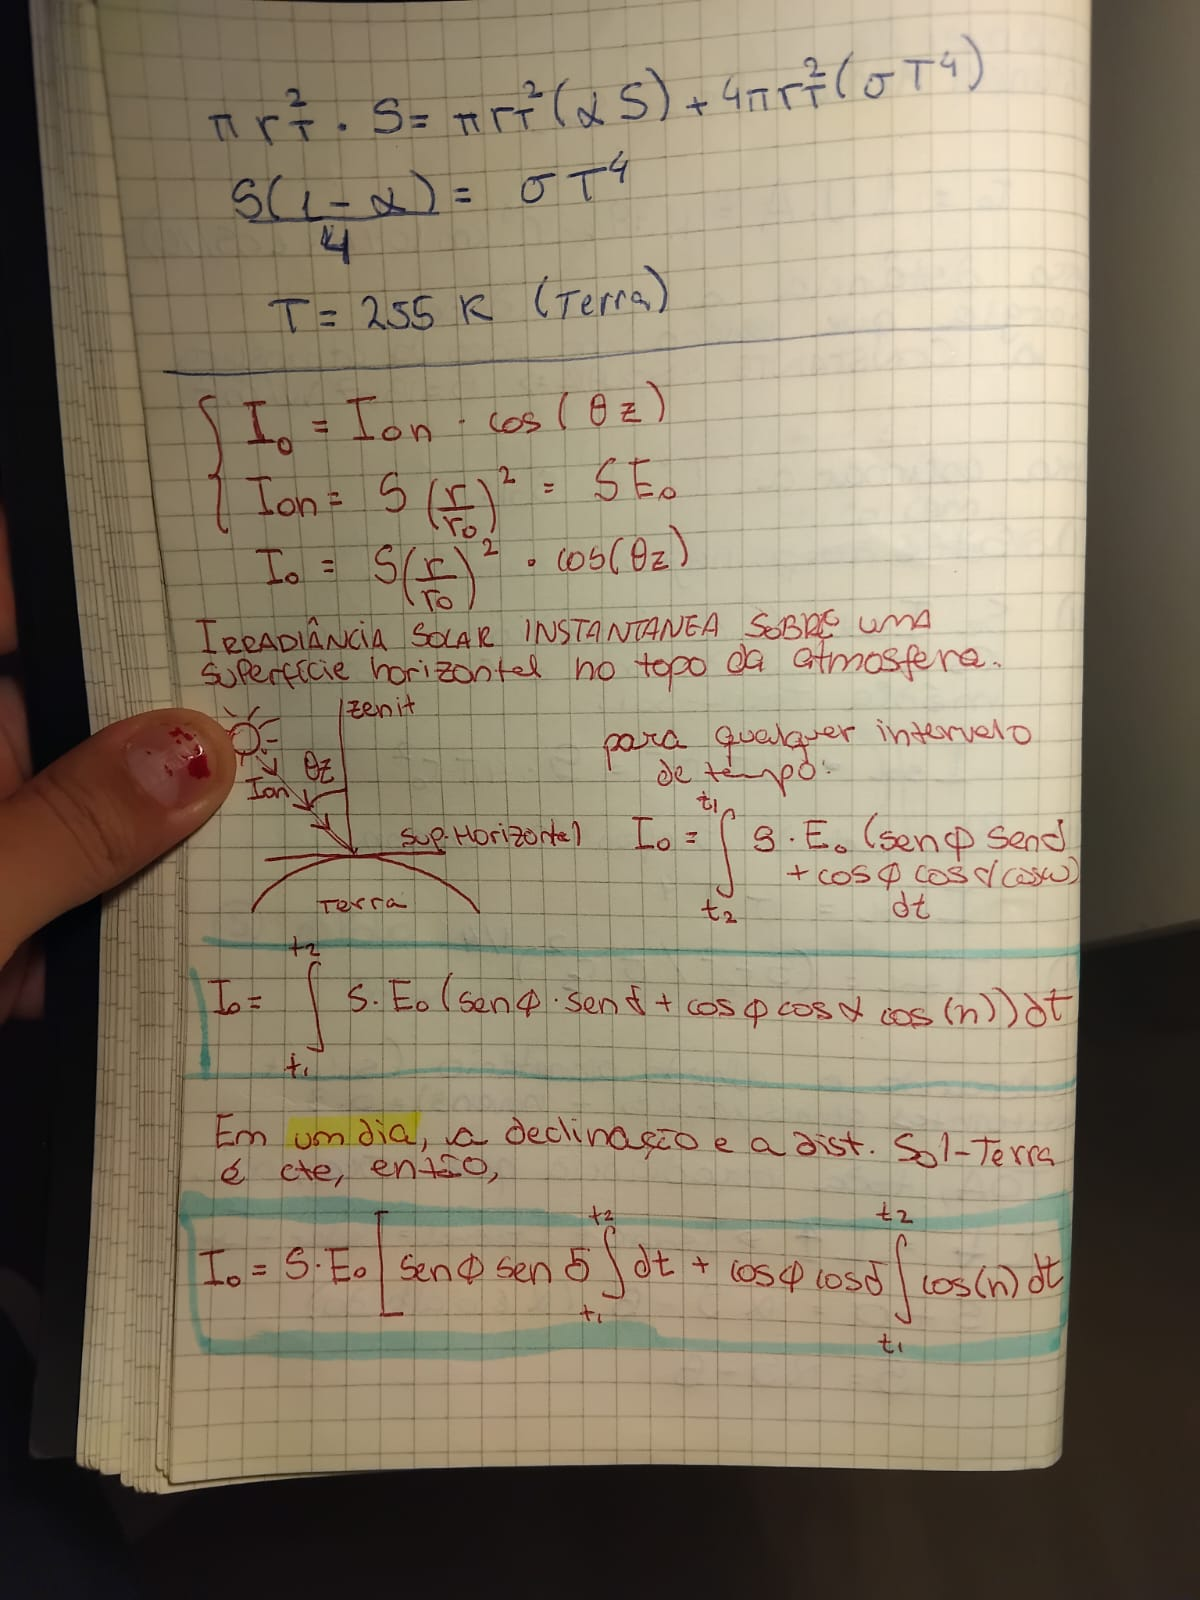


## PARTE 2: LIVRO LIOU
2.5, 2.6, 2.7, 2.9, 2.10, 2.11, 2.13 e 2.17 (nova versão)

2.5) Given the solar constant of 1366 W m−2, the mean earth–sun distance of
150 × 106 km, and the sun’s radius of 0.70 × 106 km, calculate the equilibrium
Temperature of the sun.

In [ ]:
import numpy as np  # Importa a biblioteca NumPy para cálculos matemáticos

# Constantes fornecidas
CONSTANTE_SOLAR = 1366  # W/m² (fluxo de energia recebido na Terra)
DISTANCIA_TERRA_SOL = 1.5e11  # 150 milhões de km em metros
RAIO_SOL = 7.0e8  # 0.70 milhão de km em metros
CONSTANTE_STEFAN_BOLTZMANN = 5.67e-8  # W m⁻² K⁻⁴

# Passo 1: Calcular a luminosidade total do Sol (L)
# L = CONSTANTE_SOLAR * área da esfera na distância Terra-Sol
area_esfera = 4 * np.pi * (DISTANCIA_TERRA_SOL ** 2)
luminosidade_sol = CONSTANTE_SOLAR * area_esfera

# Passo 2: Calcular a temperatura do Sol usando a Lei de Stefan-Boltzmann
# L = 4 * pi * R² * sigma * T⁴  =>  T = (L / (4 * pi * R² * sigma))^(1/4)
temperatura_sol = (luminosidade_sol / (4 * np.pi * (RAIO_SOL ** 2) * CONSTANTE_STEFAN_BOLTZMANN)) ** 0.25

# Resultado
print(f"Temperatura de equilíbrio do Sol: {temperatura_sol:.0f} K")

Temperatura de equilíbrio do Sol: 5767 K


2.6) If the average output of the sun is 6.2 × 107 W m−2, and the radius of the earth is 6.37 × 103 km, what is the total amount of energy intercepted by the earth in one day?

In [ ]:
import numpy as np

# Dados fornecidos
S_sol = 6.2e7  # Irradiância na superfície do Sol (W/m²)
raio_terra_km = 6.37e3  # Raio da Terra em km
raio_terra_m = raio_terra_km * 1e3  # Convertendo para metros
tempo_segundos = 86400  # Tempo de 1 dia em segundos

# Área da seção transversal da Terra (área do "círculo" que intercepta a radiação)
area_terra = np.pi * raio_terra_m**2

# Energia interceptada em 1 dia
energia_interceptada = S_sol * area_terra * tempo_segundos

print(f"A energia total interceptada pela Terra em um dia é de {energia_interceptada:.2e} Joules")


A energia total interceptada pela Terra em um dia é de 6.83e+26 Joules


2.7) Compute the fraction of the sun’s emittance intercepted by the earth.

In [ ]:
raio_terra_m = 6.37e6         # em metros
raio_solar_m = 6.96e8         # raio do Sol em metros

# Cálculo da fração interceptada
fracao_interceptada = (raio_terra_m**2) / (4 * raio_solar_m**2)


print(f"A fração da emissão solar interceptada pela Terra é de aproximadamente {fracao_interceptada:.3e}")


A fração da emissão solar interceptada pela Terra é de aproximadamente 2.094e-05


2.9) Assume thatr¯ is the mean albedo of the earth (albedo is defined as the ratio of the amount of flux reflected to space to the incoming solar flux), and that the earth–atmosphere system is in equilibrium. Show that the equilibrium temperature of the earth–atmosphere system Te = [(1 − r )S/4σ]^1/4.

# Cálculo da Temperatura de Equilíbrio da Terra

## Objetivo:
Demonstrar que a temperatura de equilíbrio (Te) do sistema Terra-atmosfera é dada por:
Te = [(1 - r) * S / (4 * σ)]^(1/4)

Onde:
- r = albedo terrestre (fraçao refletida)
- S = constante solar (1366 W/m²)
- σ = constante de Stefan-Boltzmann (5.67e-8 W m⁻² K⁻⁴)

## Passo 1: Radiação Solar Absorvida
A Terra intercepta a radiação solar em sua área projetada (πR²), mas reflete uma fração r (albedo):
P_abs = (1 - r) * S * πR²

## Passo 2: Radiação Térmica Emitida
Pela Lei de Stefan-Boltzmann, a Terra emite radiação por toda sua superfície (4πR²):
P_emit = σ * Te⁴ * 4πR²

## Passo 3: Equilíbrio Energético
Igualando P_abs = P_emit:
(1 - r) * S * πR² = σ * Te⁴ * 4πR²

Simplificando πR²:
(1 - r) * S = 4 * σ * Te⁴

## Passo 4: Isolando Te
Te⁴ = (1 - r) * S / (4 * σ)
Te = [(1 - r) * S / (4 * σ)]^(1/4)

In [ ]:
import numpy as np

# Constantes
S = 1366  # Constante solar (W/m²)
sigma = 5.67e-8  # Constante de Stefan-Boltzmann (W m⁻² K⁻⁴)
r = 0.3  # Albedo médio da Terra (30%)

# Cálculo de Te
Te = ((1 - r) * S / (4 * sigma)) ** 0.25

print(f"Temperatura de equilíbrio da Terra (Te): {Te:.2f} K")

Temperatura de equilíbrio da Terra (Te): 254.82 K


2.10) The following table gives the distances of various planets from the sun and their albedos. Employing the result in Exercise 2.9, compute the equilibrium
temperatures of these planets
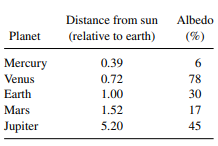


In [ ]:
# Constantes que usaremos
CONSTANTE_SOLAR_TERRA = 1366  # Energia que a Terra recebe do Sol (W/m²)
CONSTANTE_STEFAN = 5.67e-8     # Constante física para cálculo de temperatura

# Lista com os dados dos planetas
planetas = [
    ["Mercúrio", 0.39, 6],    # [Nome, distância relativa, albedo em %]
    ["Vênus", 0.72, 78],
    ["Terra", 1.00, 30],
    ["Marte", 1.52, 17],
    ["Júpiter", 5.20, 45]
]

print("Calculadora de Temperatura dos Planetas")
print("-------------------------------------")

# Vamos calcular para cada planeta
for planeta in planetas:
    nome = planeta[0]
    distancia = planeta[1]
    albedo = planeta[2] / 100  # Convertendo % para decimal (6% vira 0.06)

    # Passo 1: Ajustar a constante solar pela distância
    constante_solar_planeta = CONSTANTE_SOLAR_TERRA / (distancia ** 2)

    # Passo 2: Calcular a temperatura
    temperatura = ((1 - albedo) * constante_solar_planeta / (4 * CONSTANTE_STEFAN)) ** 0.25

    # Mostrar os resultados
    print(f"Planeta: {nome}")
    print(f"Distância do Sol (Terra=1): {distancia}")
    print(f"Albedo: {albedo*100}%")
    print(f"Temperatura calculada: {temperatura:.2f} K")
    print("-------------------------------------")

Calculadora de Temperatura dos Planetas
-------------------------------------
Planeta: Mercúrio
Distância do Sol (Terra=1): 0.39
Albedo: 6.0%
Temperatura calculada: 439.24 K
-------------------------------------
Planeta: Vênus
Distância do Sol (Terra=1): 0.72
Albedo: 78.0%
Temperatura calculada: 224.85 K
-------------------------------------
Planeta: Terra
Distância do Sol (Terra=1): 1.0
Albedo: 30.0%
Temperatura calculada: 254.82 K
-------------------------------------
Planeta: Marte
Distância do Sol (Terra=1): 1.52
Albedo: 17.0%
Temperatura calculada: 215.67 K
-------------------------------------
Planeta: Júpiter
Distância do Sol (Terra=1): 5.2
Albedo: 45.0%
Temperatura calculada: 105.21 K
-------------------------------------


2.11)  The height of earth-synchronous (geostationary) orbiting satellites, such as GOES satellites, is about 35,000 km. Using the solid angle derived in Exercise 1.2, calculate the equilibrium temperature of such a satellite in the earth–satellite system, assuming an effective equilibrium temperature of 255 K for the earth and assuming that the satellite is a blackbody.

CONCEITOS BÁSICOS:

Satélite geoestacionário: orbita a ~35.000 km da Terra, período orbital = 24h.

Temperatura de equilíbrio: balanço entre radiação absorvida e emitida.

Corpo negro: objeto ideal que absorve/emite toda radiação (emissividade = 1).

FÓRMULAS PRINCIPAIS:
a) Ângulo sólido (Ω) subtendido pela Terra:
Ω = 2π(1 - cosθ)
Onde θ = arcsen(Rₜ/(h + Rₜ))

Rₜ = raio da Terra (6.371 km)

h = altitude do satélite (35.000 km)

b) Potência radiante da Terra:
Pₜ = σTₜ⁴ × πRₜ²

σ = constante de Stefan-Boltzmann (5.67×10⁻⁸ W/m²K⁴)

Tₜ = temperatura efetiva da Terra (255 K)

c) Temperatura do satélite (Tₛ):
Tₛ = Tₜ × (Ω/4π)^(1/4)

PASSO A PASSO:

Calcular θ:
θ = arcsen(6.371/(35 + 6.371)) ≈ 8.7°

Calcular Ω:
Ω = 2π(1 - cos(8.7°)) ≈ 0.069 sterad

Aplicar fórmula final:
Tₛ = 255 × (0.069/4π)^(0.25) ≈ 66 K

In [ ]:
# Constantes
sigma = 5.67e-8          # Constante de Stefan-Boltzmann (W m⁻² K⁻⁴)
R_terra = 6.371e6        # Raio da Terra (m)
h_satelite = 3.5e7       # Altura do satélite (m)
T_terra = 255            # Temperatura efetiva da Terra (K)

# Passo 1: Calcular o ângulo sólido (Ω)
theta = np.arcsin(R_terra / (h_satelite + R_terra))  # Ângulo em radianos
Omega = 2 * np.pi * (1 - np.cos(theta))

# Passo 2: Calcular a temperatura do satélite
T_sat = T_terra * (Omega / (4 * np.pi)) ** 0.25

# Resultados
print(f"Ângulo sólido (Ω): {Omega:.4f} estereorradianos")
print(f"Temperatura de equilíbrio do satélite: {T_sat:.2f} K")

2.13) Calculate the daily insolation at the top of the atmosphere at (a) the south pole
at the winter solstice; and (b) the equator at the vernal equinox. Use the mean
earth–sun distance in your calculations and check your values with those shown
in Fig. 2.8.
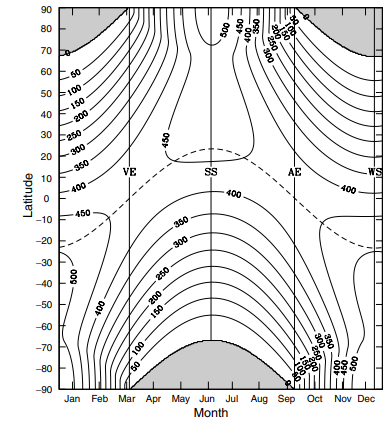

In [ ]:
def daily_insolation(lat, day_of_year):
    S = 1366  # W/m²
    delta = -23.45 * np.cos(np.radians(360*(day_of_year + 10)/365))  # Declinação solar

    # Fator de distância Terra-Sol
    dist_factor = 1 + 0.033 * np.cos(np.radians(360*day_of_year/365))

    # Ângulo horário do nascer do sol
    h0 = np.arccos(-np.tan(np.radians(lat)) * np.tan(np.radians(delta)))

    # Cálculo da insolação
    Q = (S/np.pi) * dist_factor * (h0 * np.sin(np.radians(lat)) * np.sin(np.radians(delta)) + \
        np.cos(np.radians(lat)) * np.cos(np.radians(delta)) * np.sin(h0))

    return Q

# (a) Pólo Sul no solstício de inverno
Q_south_pole = daily_insolation(-90, 172)
print(f"(a) Insolação no Pólo Sul (solstício inverno): {Q_south_pole:.1f} W/m²")

# (b) Equador no equinócio vernal
Q_equator = daily_insolation(0, 79)
print(f"(b) Insolação no Equador (equinócio vernal): {Q_equator:.1f} W/m²")

(a) Insolação no Pólo Sul (solstício inverno): nan W/m²
(b) Insolação no Equador (equinócio vernal): 437.8 W/m²


<ipython-input-31-bc08ccdb0b59>:9: RuntimeWarning: invalid value encountered in arccos
  h0 = np.arccos(-np.tan(np.radians(lat)) * np.tan(np.radians(delta)))


2.17) Compute and plot the solar irradiance at the top of the earth’s atmosphere emitted
from temperatures of 5000, 5500, and 6000 K. Compare your results with those
presented in Figs. 2.9 and 2.10.



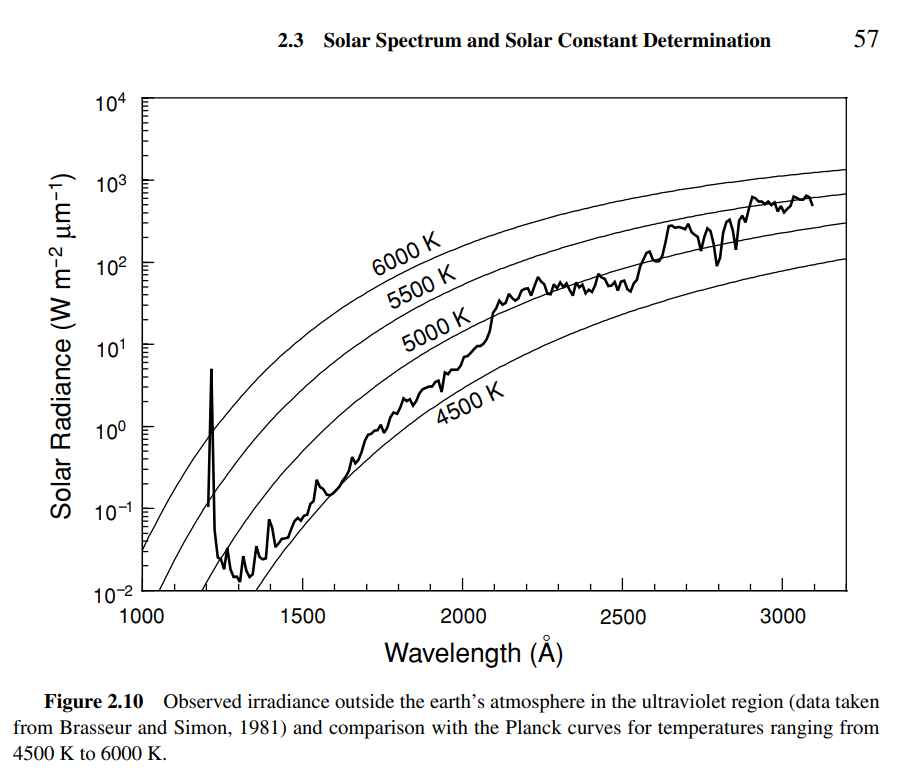

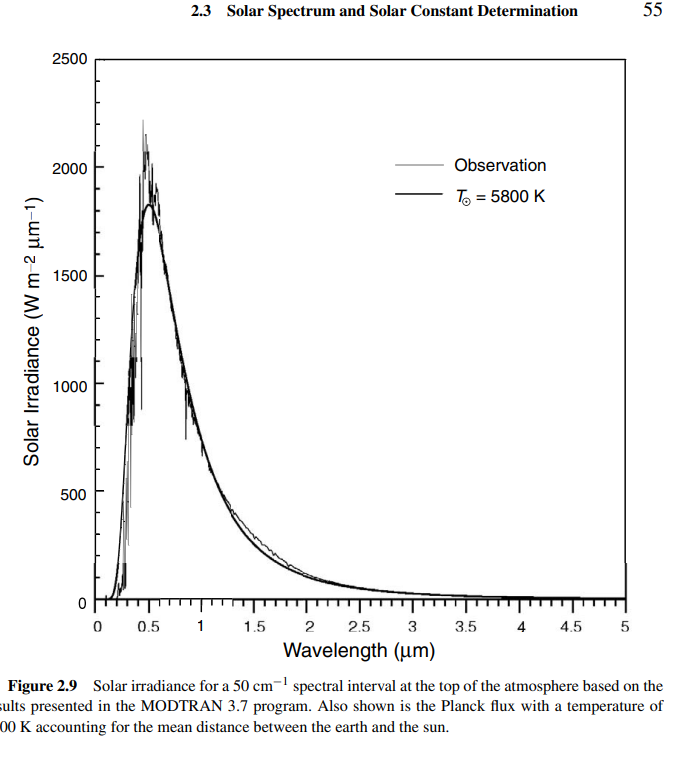



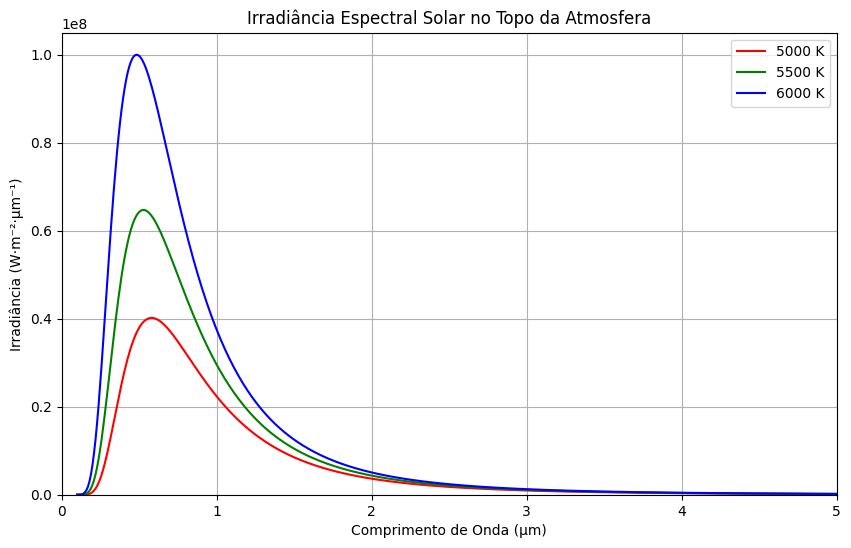

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
h = 6.626e-34     # Constante de Planck (J·s)
c = 3.0e8         # Velocidade da luz (m/s)
k = 1.381e-23     # Constante de Boltzmann (J/K)

# Comprimentos de onda de 0.1 a 5 micrômetros (μm)
wavelength_um = np.linspace(0.1, 5, 500)           # micrômetros
wavelength_m = wavelength_um * 1e-6                # converter para metros

def planck_lambda(T, wavelength_m):
    """Lei de Planck para irradiância espectral por comprimento de onda"""
    a = 2 * np.pi * h * c**2
    b = h * c / (wavelength_m * k * T)
    intensity = (a / (wavelength_m**5)) / (np.exp(b) - 1)
    return intensity * 1e-6  # converter para W·m⁻²·μm⁻¹

# Temperaturas a simular
temperaturas = [5000, 5500, 6000]
cores = ['red', 'green', 'blue']

# Plot
plt.figure(figsize=(10, 6))
for T, cor in zip(temperaturas, cores):
    irradiancia = planck_lambda(T, wavelength_m)
    plt.plot(wavelength_um, irradiancia, label=f"{T} K", color=cor)

plt.title("Irradiância Espectral Solar no Topo da Atmosfera")
plt.xlabel("Comprimento de Onda (μm)")
plt.ylabel("Irradiância (W·m⁻²·μm⁻¹)")
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0)
plt.show()


A curva referente à Temperatura de 5000 K está mais deslocada para a direita do que a curva representada na figura 2.9, o que era esperado visto que está aproximadamente 800 K abaixo da temperatura do Sol (representado na figura 2.9). Semelhantemente, a curva de 5000 K também está suavemente deslocada à direita se comparada à curva do sol na figura 2.9, pois é 300 K inferior à temperatura do sol. Por fim, a curva de 6000 K está deslocada para a esquerda e é de valor superior à Temperatura do Sol, o que também corrobora com a Lei de wien, na qual o comprimento de onda de máxima emissão é inversamente proporcional à temperatura do corpo negro em questão. Por fim, a

A Figura 2.10 mostra o espectro na superfície terrestre, e há Vários vales e picos na irradiância.
Esses vales correspondem à absorção atmosférica (por vapor d’água, CO₂, O₃, etc.).
O gráfico gerado pelo código não mostra essas quedas porque: Ele simula um corpo negro idealizado — ou seja, sem atmosfera, exatamente como a Figura 2.9 (extraterrestre).

In [ ]:
#teste